In [25]:
import meep as mp
from meep.materials import Al
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
import imageio

In [26]:
resolution = 50

cell_size = mp.Vector3(4,4,0)

lambda_min = 0.4
lambda_max = 0.7

fmin = 1 / lambda_max
fmax = 1 / lambda_min

fcen = 0.5 * (fmin + fmax)
df = fmax - fmin

In [27]:
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=fcen),
        component=mp.Ex,
        center=mp.Vector3(0,0,0),
    )
]

In [28]:
pml_layers = [
    mp.Absorber(thickness=0.5, direction=mp.X, side=mp.Low),  # 좌측 Absorber
    mp.Absorber(thickness=0.5, direction=mp.X, side=mp.High), # 우측 Absorber
    mp.Absorber(thickness=0.5, direction=mp.Y, side=mp.High), # 상단 Absorber
    mp.Absorber(thickness=0.5, direction=mp.Y, side=mp.Low), # 상단 Absorber
]

In [29]:
alq3_center = 0
Al_center = -1.25

alq3_index = mp.Medium(index = 1.68)

geometry = [
    mp.Block(
        size = mp.Vector3(3, 2.5, mp.inf),
        center=mp.Vector3(0,0.25,0),
        material=alq3_index,
    ),
    mp.Block(
        size = mp.Vector3(3, 0.5, mp.inf),
        center = mp.Vector3(0, -1.25, 0),
        material = mp.perfect_electric_conductor
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    sources=sources,
    geometry=geometry,
    resolution=resolution,
    default_material=mp.Medium(index = 1),
    boundary_layers=pml_layers
)

     block, center = (0,0.25,0)
          size (3,2.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.8224,2.8224,2.8224)
     block, center = (0,-1.25,0)
          size (3,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)


<Axes: xlabel='X', ylabel='Y'>

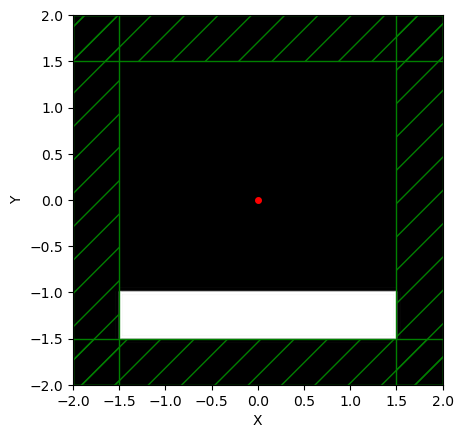

In [30]:
sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 4.19617e-05 s
Working in 2D dimensions.
Computational cell is 4 x 4 x 0 with resolution 50
     block, center = (0,0.25,0)
          size (3,2.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.8224,2.8224,2.8224)
     block, center = (0,-1.25,0)
          size (3,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
time for set_epsilon = 0.035537 s
time for set_conductivity = 0.00116301 s
time for set_conductivity = 0.00113702 s
time for set_conductivity = 0.00115585 s
time for set_conductivity = 0.00112319 s
time for set_conductivity = 0.00114894 s
time for set_conductivity = 0.00112796 s
-----------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Meep progress: 35.0/200.0 = 17.5% done in 4.1s, 19.3s to go
on time step 3500 (time=35), 0.00117225 s/step
Meep progress: 67.0/200.0 = 33.5% done in 8.2s, 16.3s to go
on time step 6700 (time=67), 0.00128004 s/step
Meep progress: 101.0/200.0 = 50.5% done in 12.3s, 12.0s to go
on time step 10100 (time=101), 0.00119793 s/step
Meep progress: 136.0/200.0 = 68.0% done in 16.3s, 7.7s to go
on time step 13600 (time=136), 0.00114645 s/step
Meep progress: 170.0/200.0 = 85.0% done in 20.3s, 3.6s to go
on time step 17000 (time=170), 0.00119401 s/step
run 0 finished at t = 200.0 (20000 timesteps)


/tmp/ipykernel_12937/928305159.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))


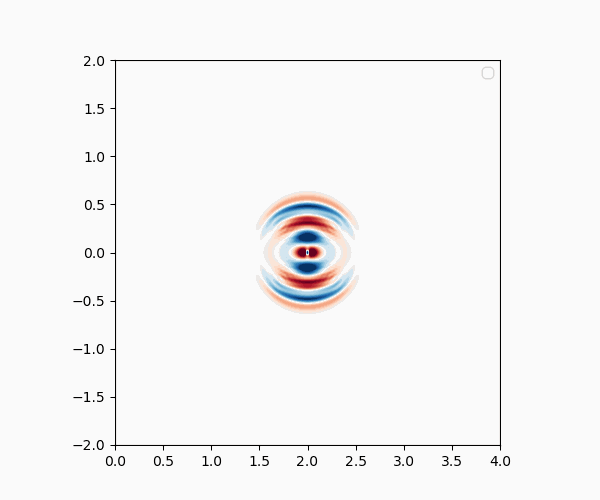

In [31]:
# === 이미지 저장용 디렉토리 생성 ===
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# === 프레임 저장 함수 ===
frame_idx = 0

def save_frame(sim):
    global frame_idx
    field = sim.get_array(component=mp.Ex, center=mp.Vector3(), size=cell_size)

    plt.figure(figsize=(6, 5))
    plt.imshow(field.T, cmap='RdBu', interpolation='spline36', origin='lower',
               vmin=-1, vmax=1, extent=(0, cell_size.x, -cell_size.y/2, cell_size.y/2))

    

    # 범례 (선택사항: 최초 프레임에서만 보기 좋음)
    if frame_idx == 0:
        plt.legend(loc='upper right')

    fname = os.path.join(output_dir, f"frame_{frame_idx:03d}.png")
    plt.savefig(fname)
    plt.close()
    frame_idx += 1



# === 시뮬레이션 실행 ===
sim.run(mp.at_every(1.0, save_frame), until=200)

# === gif 생성 ===
images = []
for i in range(frame_idx):
    fname = os.path.join(output_dir, f"frame_{i:03d}.png")
    images.append(imageio.imread(fname))

gif_path = "wave_propagation.gif"
imageio.mimsave(gif_path, images, fps=5)

# === IPython으로 결과 출력 ===
display(Image(filename=gif_path))